## Visualize the lr_scheduler in Pytorch 
This notebook plots the learning rate curve using different learning rate schedulers implemented in pytorch.

In [38]:
# create a dump network
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%pylab inline

class DumpNet(nn.Module):
    def __init__(self):
        super(DumpNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1, stride=1)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x
# dump network and optimzer
net = DumpNet()

Populating the interactive namespace from numpy and matplotlib


## LambdaLR

* Sets the learning rate of each parameter group to the initial lr times a given 'lambda' function. When last_epoch=-1, sets initial lr as lr.
* lambda function can be a list of function for each parameter group.

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* lr_lambda (function or list) – A function which computes a multiplicative factor given an integer parameter epoch, or a list of such functions, one for each group in optimizer.param_groups.
* last_epoch (int) – The index of last epoch. Default: -1.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

Text(0.5, 1.0, 'LambdaLR')

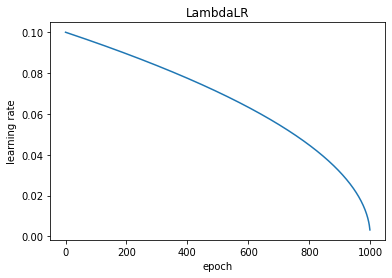

In [39]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
lr_lambda = lambda epoch: ((max_epoch - epoch) / max_epoch)**0.5
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('LambdaLR')

Text(0.5, 1.0, 'LambdaLR')

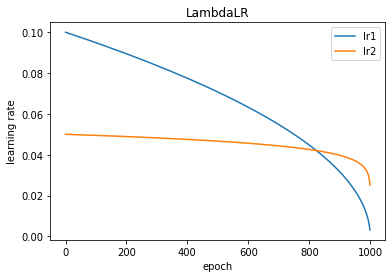

In [40]:
# set different initial learning rate and lambda function for each parameter group
params = [{'params':net.conv1.parameters()}, {'params':net.conv2.parameters(), 'lr':0.05}]
optimizer = torch.optim.SGD(params, lr=0.1, momentum=0.9)
max_epoch = 1000
lr_lambda = [lambda epoch: ((max_epoch - epoch) / max_epoch)**0.5, 
             lambda epoch: ((max_epoch - epoch) / max_epoch)**0.1]
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.legend(['lr1', 'lr2'])
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('LambdaLR')

## MultiplicativeLR
* Multiply the learning rate of each parameter group by the factor given in the specified function. When last_epoch=-1, sets initial lr as lr.

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* lr_lambda (function or list) – A function which computes a multiplicative factor given an integer parameter epoch, or a list of such functions, one for each group in optimizer.param_groups.
* last_epoch (int) – The index of last epoch. Default: -1.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

Text(0.5, 1.0, 'MultiplicativeLR')

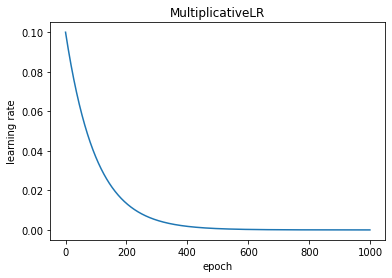

In [41]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
lr_lambda = lambda epoch: 0.99
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lr_lambda, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('MultiplicativeLR')

## StepLR
* Decays the learning rate of each parameter group by gamma every step_size epochs.
* When last_epoch=-1, sets initial lr as lr.

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* step_size (int) – Period of learning rate decay.
* gamma (float) – Multiplicative factor of learning rate decay. Default: 0.1.
* last_epoch (int) – The index of last epoch. Default: -1.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

Text(0.5, 1.0, 'StepLR')

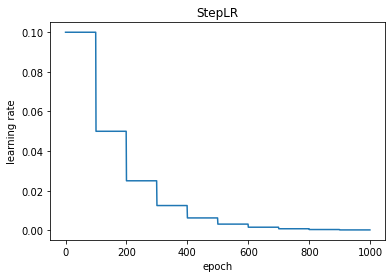

In [42]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('StepLR')

## MultiStepLR
* Decays the learning rate of each parameter group by gamma once the number of epoch reaches one of the milestones. 
* When last_epoch=-1, sets initial lr as lr.


**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* milestones (list) – List of epoch indices. Must be increasing.
* gamma (float) – Multiplicative factor of learning rate decay. Default: 0.1.
* last_epoch (int) – The index of last epoch. Default: -1.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

Text(0.5, 1.0, 'MultiStepLR')

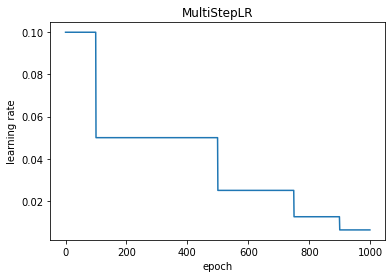

In [43]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[100, 500, 750, 900], 
                                                 gamma=0.5, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('MultiStepLR')

## ExponentialLR
* Decays the learning rate of each parameter group by gamma every epoch. 
* When last_epoch=-1, sets initial lr as lr.


**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* gamma (float) – Multiplicative factor of learning rate decay.
* last_epoch (int) – The index of last epoch. Default: -1.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

Text(0.5, 1.0, 'ExponentialLR')

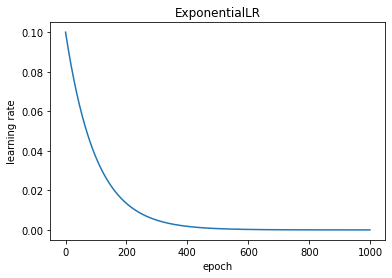

In [44]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('ExponentialLR')

## CosineAnnealingLR
* Set the learning rate of each parameter group using a cosine annealing schedule.
* It has been proposed in [SGDR: Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983). Note that this only implements the cosine annealing part of SGDR, and not the restarts.

* $\eta_t=\eta_{min}+\frac{1}{2}(\eta_{max}−\eta_{min})(1+cos(\frac{T_{cur}}{T_{max}}π))$, where $T_{cur}$ is the number of iterations since the last restart and $T_{max}$ is the total iterations.

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* T_max (int) – Maximum number of iterations.
* eta_min (float) – Minimum learning rate. Default: 0.
* last_epoch (int) – The index of last epoch. Default: -1.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

Text(0.5, 1.0, 'CosineAnnealingLR')

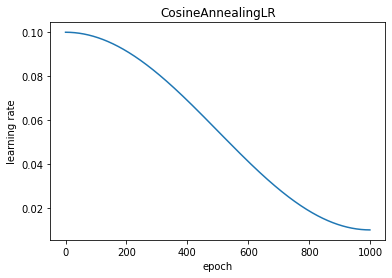

In [45]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=max_epoch, eta_min=0.01, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('CosineAnnealingLR')

## CyclicLR
* Sets the learning rate of each parameter group according to cyclical learning rate policy (CLR). 
* The policy cycles the learning rate between two boundaries with a constant frequency, as detailed in the paper [Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/abs/1506.01186).

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* base_lr (float or list) – Initial learning rate which is the lower boundary in the cycle for each parameter group.
* max_lr (float or list) – Upper learning rate boundaries in the cycle for each parameter group. Functionally, it defines the cycle amplitude (max_lr - base_lr). The lr at any cycle is the sum of base_lr and some scaling of the amplitude; therefore max_lr may not actually be reached depending on scaling function.
* step_size_up (int) – Number of training iterations in the increasing half of a cycle. Default: 2000
* step_size_down (int) – Number of training iterations in the decreasing half of a cycle. If step_size_down is None, it is set to step_size_up. Default: None
* mode (str) – One of {triangular, triangular2, exp_range}. Values correspond to policies detailed above. If scale_fn is not None, this argument is ignored. Default: ‘triangular’
* gamma (float) – Constant in ‘exp_range’ scaling function: gamma**(cycle iterations) Default: 1.0
* scale_fn (function) – Custom scaling policy defined by a single argument lambda function, where 0 <= scale_fn(x) <= 1 for all x >= 0. If specified, then ‘mode’ is ignored. Default: None
* scale_mode (str) – {‘cycle’, ‘iterations’}. Defines whether scale_fn is evaluated on cycle number or cycle iterations (training iterations since start of cycle). Default: ‘cycle’
* cycle_momentum (bool) – If True, momentum is cycled inversely to learning rate between ‘base_momentum’ and ‘max_momentum’. Default: True
* base_momentum (float or list) – Lower momentum boundaries in the cycle for each parameter group. Note that momentum is cycled inversely to learning rate; at the peak of a cycle, momentum is ‘base_momentum’ and learning rate is ‘max_lr’. Default: 0.8
* max_momentum (float or list) – Upper momentum boundaries in the cycle for each parameter group. Functionally, it defines the cycle amplitude (max_momentum - base_momentum). The momentum at any cycle is the difference of max_momentum and some scaling of the amplitude; therefore base_momentum may not actually be reached depending on scaling function. Note that momentum is cycled inversely to learning rate; at the start of a cycle, momentum is ‘max_momentum’ and learning rate is ‘base_lr’ Default: 0.9
* last_epoch (int) – The index of the last batch. This parameter is used when resuming a training job. Since step() should be invoked after each batch instead of after each epoch, this number represents the total number of batches computed, not the total number of epochs computed. When last_epoch=-1, the schedule is started from the beginning. Default: -1
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.



Text(0.5, 1.0, 'CyclicLR')

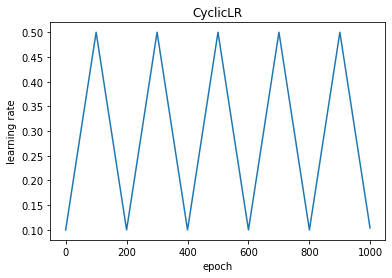

In [46]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.1, max_lr=0.5, 
                                  step_size_up=100, step_size_down=None, mode='triangular', 
                                  gamma=1.0, scale_fn=None, scale_mode='cycle', 
                                  cycle_momentum=True, base_momentum=0.8, max_momentum=0.9, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('CyclicLR')

## OneCycleLR
* The 1cycle policy anneals the learning rate from an initial learning rate to some maximum learning rate and then from that maximum learning rate to some minimum learning rate much lower than the initial learning rate.
* This policy was initially described in the paper [Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates.](https://arxiv.org/abs/1708.07120)

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* max_lr (float or list) – Upper learning rate boundaries in the cycle for each parameter group.
* total_steps (int) – The total number of steps in the cycle. Note that if a value is not provided here, then it must be inferred by providing a value for epochs and steps_per_epoch. Default: None
* epochs (int) – The number of epochs to train for. This is used along with steps_per_epoch in order to infer the total number of steps in the cycle if a value for total_steps is not provided. Default: None
* steps_per_epoch (int) – The number of steps per epoch to train for. This is used along with epochs in order to infer the total number of steps in the cycle if a value for total_steps is not provided. Default: None
* pct_start (float) – The percentage of the cycle (in number of steps) spent increasing the learning rate. Default: 0.3
* anneal_strategy (str) – {‘cos’, ‘linear’} Specifies the annealing strategy: “cos” for cosine annealing, “linear” for linear annealing. Default: ‘cos’
* cycle_momentum (bool) – If True, momentum is cycled inversely to learning rate between ‘base_momentum’ and ‘max_momentum’. Default: True
* base_momentum (float or list) – Lower momentum boundaries in the cycle for each parameter group. Note that momentum is cycled inversely to learning rate; at the peak of a cycle, momentum is ‘base_momentum’ and learning rate is ‘max_lr’. Default: 0.85
* max_momentum (float or list) – Upper momentum boundaries in the cycle for each parameter group. Functionally, it defines the cycle amplitude (max_momentum - base_momentum). Note that momentum is cycled inversely to learning rate; at the start of a cycle, momentum is ‘max_momentum’ and learning rate is ‘base_lr’ Default: 0.95
* div_factor (float) – Determines the initial learning rate via initial_lr = max_lr/div_factor Default: 25
* final_div_factor (float) – Determines the minimum learning rate via min_lr = initial_lr/final_div_factor Default: 1e4
* last_epoch (int) – The index of the last batch. This parameter is used when resuming a training job. Since step() should be invoked after each batch instead of after each epoch, this number represents the total number of batches computed, not the total number of epochs computed. When last_epoch=-1, the schedule is started from the beginning. Default: -1
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.




Text(0.5, 1.0, 'OneCycleLR')

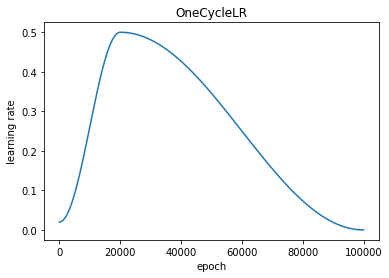

In [47]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
steps_per_epoch = 100
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.5, total_steps=None, 
                                                epochs=max_epoch, steps_per_epoch=steps_per_epoch, pct_start=0.2, 
                                                anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, 
                                                max_momentum=0.95, div_factor=25.0, final_div_factor=10000.0, 
                                                last_epoch=-1)
xs = list()
ys = list()
for step in range(max_epoch*steps_per_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(step)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('OneCycleLR')

## ReduceLROnPlateau
Reduce learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This scheduler reads a metrics quantity and if no improvement is seen for a ‘patience’ number of epochs, the learning rate is reduced.

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* mode (str) – One of min, max. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing. Default: ‘min’.
* factor (float) – Factor by which the learning rate will be reduced. new_lr = lr * factor. Default: 0.1.
* patience (int) – Number of epochs with no improvement after which learning rate will be reduced. For example, if patience = 2, then we will ignore the first 2 epochs with no improvement, and will only decrease the LR after the 3rd epoch if the loss still hasn’t improved then. Default: 10.
* threshold (float) – Threshold for measuring the new optimum, to only focus on significant changes. Default: 1e-4.
* threshold_mode (str) – One of rel, abs. In rel mode, dynamic_threshold = best * ( 1 + threshold ) in ‘max’ mode or best * ( 1 - threshold ) in min mode. In abs mode, dynamic_threshold = best + threshold in max mode or best - threshold in min mode. Default: ‘rel’.
* cooldown (int) – Number of epochs to wait before resuming normal operation after lr has been reduced. Default: 0.
* min_lr (float or list) – A scalar or a list of scalars. A lower bound on the learning rate of all param groups or each group respectively. Default: 0.
* eps (float) – Minimal decay applied to lr. If the difference between new and old lr is smaller than eps, the update is ignored. Default: 1e-8.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

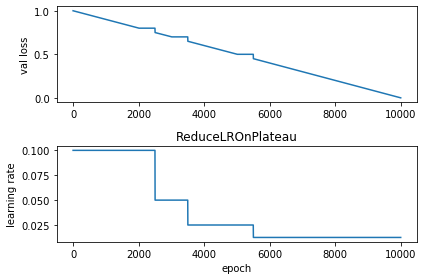

In [48]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 100
steps_per_epoch = 100
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, 
                                           patience=498, threshold=0.00009, threshold_mode='abs', 
                                           cooldown=0, min_lr=0, eps=1e-08, verbose=False)
xs = list()
ys = list()
val_losses = list()
# simulate validation loss
for step in range(max_epoch*steps_per_epoch):
    val_loss = 1 - step / (max_epoch*steps_per_epoch)
    val_losses.append(val_loss)
    xs.append(step)
# create some plateau with light gaussian noise
val_losses = np.array(val_losses)
val_losses[2000:2500] = 1 - 2000 / (max_epoch*steps_per_epoch) - np.random.normal(0, 1, 500)*1e-5
val_losses[3000:3500] = 1 - 3000 / (max_epoch*steps_per_epoch) - np.random.normal(0, 1, 500)*1e-5
val_losses[5000:5500] = 1 - 5000 / (max_epoch*steps_per_epoch) - np.random.normal(0, 1, 500)*1e-5

fig1 = plt.subplot(2, 1, 1)
fig1.plot(xs, val_losses)
fig1.set_ylabel('val loss')

for step in range(max_epoch*steps_per_epoch):
    current_lr = optimizer.param_groups[0]['lr']
    optimizer.step() # deceptive parameter update
    scheduler.step(val_losses[step])
    ys.append(current_lr)
# plot the curve
fig2 = plt.subplot(2, 1, 2)
fig2.plot(xs, ys)
fig2.set_xlabel('epoch')
fig2.set_ylabel('learning rate')
plt.title('ReduceLROnPlateau')
plt.tight_layout()

## CosineAnnealingWarmRestarts
* Set the learning rate of each parameter group using a cosine annealing schedule, where $\eta_{max}$ is set to the initial lr, $T_{cur}$ is the number of epochs since the last restart and $T_{i}$ is the number of epochs between two warm restarts in SGDR.

* $\eta_t=\eta_{min}+\frac{1}{2}(\eta_{max}−\eta_{min})(1+\cos(\frac{T_{cur}}{T_{i}}π))$ 
* When $T_{cur}=T_{i}$, set $\eta_t = \eta_{min}$. When $T_{cur}=0$ after restart, set $\eta_t=\eta_{max}$.

**Hyperparameters**
* optimizer (Optimizer) – Wrapped optimizer.
* T_0 (int) – Number of iterations for the first restart.
* T_mult (int, optional) – A factor increases $T_{i}$ after a restart. Default: 1.
* eta_min (float, optional) – Minimum learning rate. Default: 0.
* last_epoch (int, optional) – The index of last epoch. Default: -1.
* verbose (bool) – If True, prints a message to stdout for each update. Default: False.

Text(0.5, 1.0, 'CosineAnnealingWarmRestarts')

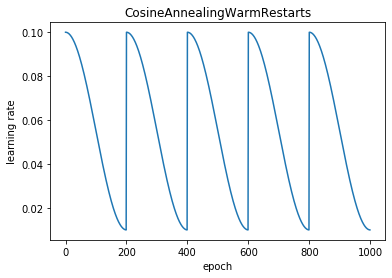

In [49]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
max_epoch = 1000
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=200, T_mult=1, 
                                                                 eta_min=0.01, last_epoch=-1)
xs = list()
ys = list()
for epoch in range(max_epoch):
    current_lr = scheduler.get_last_lr()
    optimizer.step() # deceptive parameter update
    scheduler.step()
    xs.append(epoch)
    ys.append(current_lr)
# plot the curve
plt.plot(xs, ys)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('CosineAnnealingWarmRestarts')